## The Normal Distribution

The normal distribution is a continuous probability distribution. It is also called the Gaussian distribution. The probability density function (pdf) of the normal distribution is given by:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}\\
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation. The normal distribution is symmetric around the mean $\mu$. The standard normal distribution has $\mu = 0$ and $\sigma = 1$.

Instead of writing the density function every time we want to refer to the normal distribution, we use the notation $X \sim N(\mu, \sigma^2)$ to denote that the random variable $X$ has a normal distribution with mean $\mu$ and variance $\sigma^2$.

$$
X \sim N(\mu, \sigma^2) \\
E(X) = \mu \\
Var(X) = \sigma^2 \\
SD(X) = \sqrt{\sigma^2} = \sigma
$$

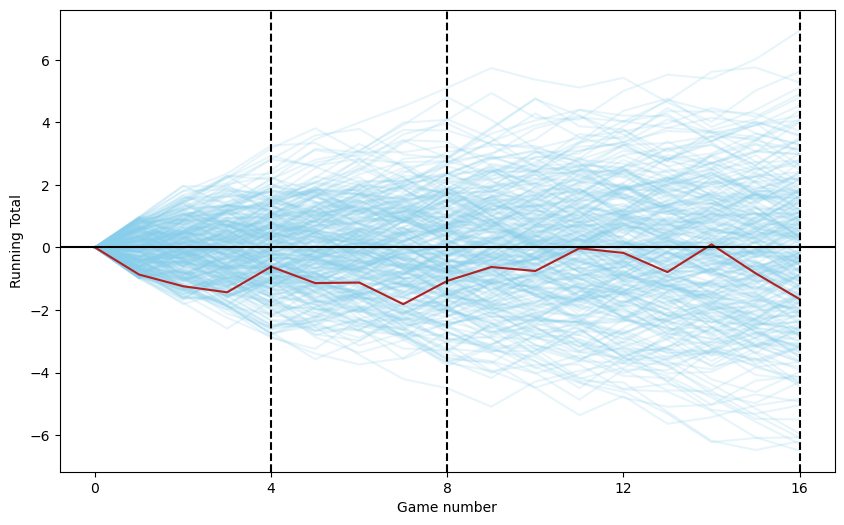

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

players_n = 300
games_n = 16

# Create a DataFrame similar to expand_grid in R
unif_games = pd.DataFrame(np.array(np.meshgrid(np.arange(1, games_n + 1), np.arange(1, players_n + 1))).T.reshape(-1,2), columns=['game', 'player'])

# Add result column with random uniform values between -1 and 1
unif_games['result'] = np.random.uniform(-1, 1, size=len(unif_games))

# Add initial values for each player
initial_values = pd.DataFrame({'player': np.arange(1, players_n + 1), 'game': 0, 'result': 0})
unif_games = pd.concat([unif_games, initial_values])

# Sort values and calculate running total for each player
unif_games = unif_games.sort_values(['player', 'game'])
unif_games['running_total'] = unif_games.groupby('player')['result'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
for player in unif_games['player'].unique():
    player_data = unif_games[unif_games['player'] == player]
    plt.plot(player_data['game'], player_data['running_total'], color='skyblue', alpha=0.2)

# First player
player_data = unif_games[unif_games['player'] == 1]
plt.plot(player_data['game'], player_data['running_total'], color='firebrick', label='Player 1')

plt.axhline(0, color='black')

for mark in [4, 8, 16]:
    plt.axvline(x=mark, linestyle='--', color='black')

plt.xlabel('Game number')
plt.ylabel('Running Total')
plt.xticks([0, 4, 8, 12, 16])
plt.show()

## The Multivariate Normal Distribution

The multivariate normal distribution is a generalization of the one-dimensional normal distribution to higher dimensions. The probability density function (pdf) of the multivariate normal distribution is given by:

$$
f(x) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} e^{-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)}\\
$$

where $\mu$ is the mean vector and $\Sigma$ is the covariance matrix. The multivariate normal distribution is symmetric around the mean $\mu$. The standard multivariate normal distribution has $\mu = 0$ and $\Sigma = I$, where $I$ is the identity matrix.


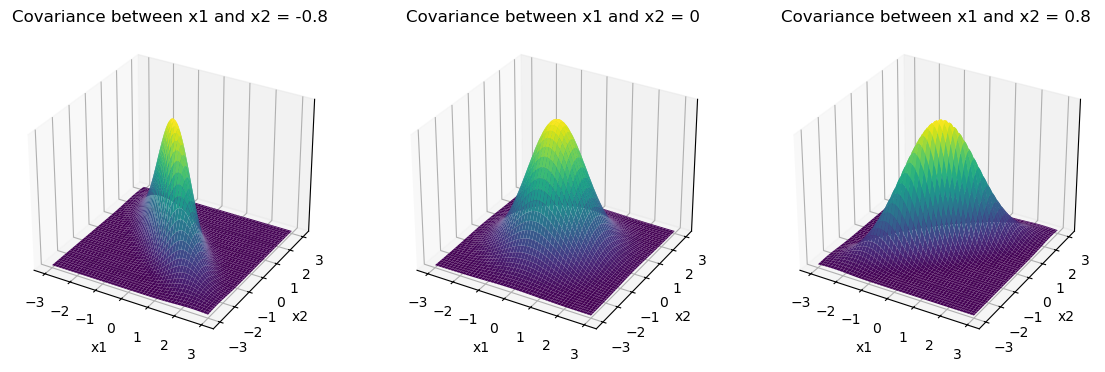

In [13]:

# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
# plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14, 6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino 
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for 
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])


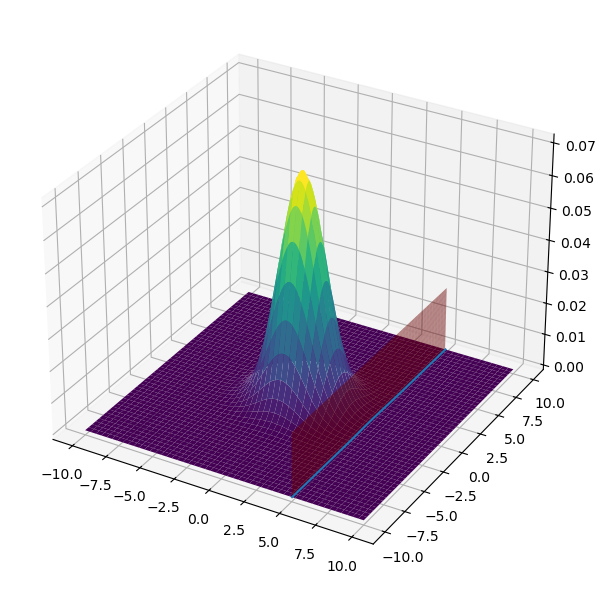

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set for Gaussian distribution
mu_x = 0
sigma_x = np.sqrt(5)
mu_y = 0
sigma_y = np.sqrt(5)

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
MVN = multivariate_normal(mean=[mu_x,mu_y], cov=[[sigma_x,0],[0,sigma_y]])

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = MVN.pdf(pos)

# Create plane
x_p = 0
y_p = np.linspace(-10,10,500)
z_p = np.linspace(0,0.02,500)
Y_p, Z_p = np.meshgrid(y_p, z_p)

# Finding closest idx values of X mesh to x_p
tol = 1e-4
idx_x_p = (np.where(x < x_p+tol) and np.where(x > x_p-tol))[0][0]
# Select the corresponding values of X, Y, Z (carefully switch X and Y)
x_c, y_c, z_c = Y[idx_x_p], X[idx_x_p], Z[idx_x_p]

# Plot
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis',linewidth=0,zorder=0)
ax.plot_surface(x_p, Y_p, Z_p, color='r',linewidth=0, alpha=0.5,zorder=5)
ax.plot(x_c,y_c,z_c,zorder=10)

plt.tight_layout()